# **Dataset: Wine Quality**

Develop a classification model for classifying the quality of an unseen wine, from the
measured set of attributes, as good or bad. The threshold score for good wine is 7
i.e. score of 7 or higher is good.

**1) Learn (via online-search and discussion) the meaning of the following terms.**

*   True Positives (TP): Both actually and predicted are positive
*   False Positives (FP): Actually is negative and predicted is positive
*   True Negatives (TN): Both actually and predicted are negative
*   False Negatives (FN): Actually is positive and predicted is negative





**2) Interpret the definition of each the following performance metrics and discuss its implication.**

*   Accuracy = (𝑇𝑃+𝑇𝑁)/(𝑇𝑃+𝐹𝑃+𝑇𝑁+𝐹𝑁)
           A common metric used to evaluate the overall correctness. It measures the proportion of correctly classified instances (TP + TN) out of the total instances in the dataset (TP + FP + TN + FN). It shows how often your model is correct overall, but can be misleading when classes are imbalanced.
*   Precision = 𝑇𝑃/(𝑇𝑃+𝐹𝑃)
           A metric that focuses on the instances that the model predicted as positive (TP + FP). How many of the things your model said are positive are actually correct (TP). This make high precision means the model is good at avoiding false positives (FP), but it might miss some true positives (TP).
*   Recall (or Sensitivity) = 𝑇𝑃/(𝑇𝑃+𝐹𝑁)
           A metric that focuses on the instances that the model actually as positive (TP + FN). How many of the actual positive things (TP) your model found out of all the positive things (TP + FN). This make high recall indicates that the model is effective at finding most of the actual positive instances but it might predict more false positives (FP).
*   F1 Score = 2/((1/Precision) +(1/Recall))
           The harmonic mean of precision and recall. It provides a balance between these two metrics, taking into account both false positives (FP) and false negatives (FN). This making it useful for situations where you want to balance precision and recall. It's especially valuable when classes are imbalanced.

**3) Decide on how you will approach the problem**

Red wines only

**4) Split the dataset into training set and testing set. For those who understand the usage of validation set, the testing set may be used as the validation set in this learning session.**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
import pandas as pd
import io
# load data
df = pd.read_csv(io.StringIO(uploaded['winequality-red.csv'].decode('utf-8')), delimiter=';', quotechar='"')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# Convert dataset values to numeric
df = df.apply(pd.to_numeric, errors='coerce')
# Drop rows with missing values
df.dropna(inplace=True)
# add column quality_class with check quality when score more than or equal 7 is good otherwise bad
df['quality_class'] = df['quality'].apply(lambda score: 'good' if score >= 7 else 'bad')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,bad


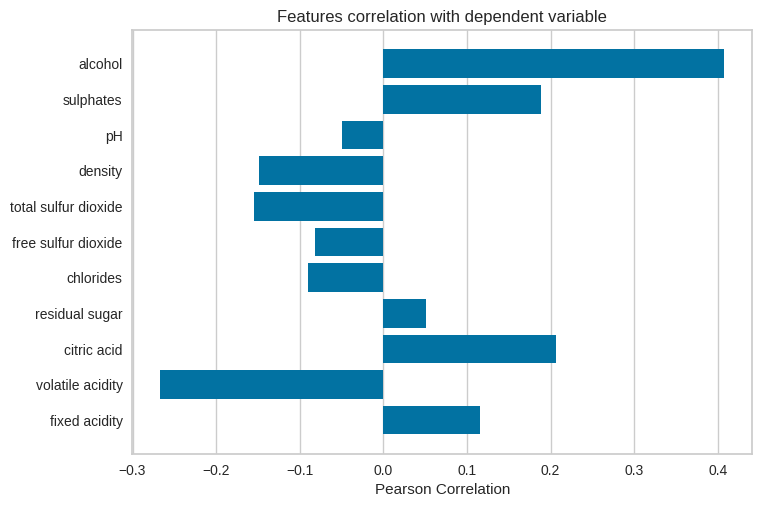

<Figure size 800x550 with 0 Axes>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from yellowbrick.target.feature_correlation import feature_correlation

X = df.drop(['quality', 'quality_class'], axis=1).values  # Features
y = (df['quality_class'] == 'good').astype(int).values  # Convert to binary labels (0 or 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the dataset into training set and testing set
# Correlation
feature_labels = df.drop(['quality', 'quality_class'], axis=1).columns.tolist()
visualizer = feature_correlation(X_train, y_train, labels=feature_labels)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
positive = np.sum(y_train)  # Count of samples in the positive class
negative = len(y_train) - positive  # Count of samples in the negative class
positive_prop = positive / len(y_train)
negative_prop = negative / len(y_train)
print(f'Positive Class Proportion: {positive_prop:.4f}')
print(f'Negative Class Proportion: {negative_prop:.4f}')

Positive Class Proportion: 0.1329
Negative Class Proportion: 0.8671


**5) Code a notebook to create a neural network model for classification. There will be a number of options to choose for the model**

*   The number of hidden layers is 1
*   The number of neurons in each hidden layers is 32
*   The activation functions are ReLU (Rectified Linear Unit) for the input and hidden layers, and Sigmoid for the output layer
*   The Keras model to be used is Sequential
*   The optimizer is Adam
*   The number of epochs is 100 and the batch size is 64

In [ ]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Create a model with Sequential
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)
# Compile
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
# Train
model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=64, callbacks=[early_stopping])
# Evaluate model on testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/100
16/16 [==============================] - 2s 52ms/step - loss: 0.5713 - accuracy: 0.7742 - val_loss: 0.4490 - val_accuracy: 0.8828
Epoch 2/100
16/16 [==============================] - 0s 19ms/step - loss: 0.4242 - accuracy: 0.8622 - val_loss: 0.3525 - val_accuracy: 0.8867
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 0.3623 - accuracy: 0.8651 - val_loss: 0.3032 - val_accuracy: 0.8984
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.3287 - accuracy: 0.8827 - val_loss: 0.2735 - val_accuracy: 0.8906
Epoch 5/100
16/16 [==============================] - 0s 7ms/step - loss: 0.3087 - accuracy: 0.8837 - val_loss: 0.2603 - val_accuracy: 0.8984
Epoch 6/100
16/16 [==============================] - 0s 7ms/step - loss: 0.2961 - accuracy: 0.8817 - val_loss: 0.2535 - val_accuracy: 0.8945
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 0.2887 - accuracy: 0.8876 - val_loss: 0.2452 - val_accuracy: 0.8984
Epoch 8/100

**6) Code a cell to calculate performance metrics on the testing set results; accuracy, precision, recall, and f1. For this problem, it is natural to assume that “good” is positive.**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary classes
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1: {f1:.4f}")

10/10 [==============================] - 0s 2ms/step
Accuracy: 0.8875
Precision: 0.6897
Recall: 0.4255
F1: 0.5263


**7) Tune the model by iteratively adjusting the variables involved in the model development.**

Test the model's performance with learning rate
*   Learning Rate : 0.001, 0.01, 0.1

In [ ]:
learning_rates = [0.001, 0.01, 0.1]
for learning_rate in learning_rates:
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=64, callbacks=[early_stopping], verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)
    f1 = f1_score(y_test, y_pred_classes)
    print(f'Learning Rate: {learning_rate}')
    print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}\n")

10/10 [==============================] - 0s 3ms/step
Learning Rate: 0.001
Test Loss: 0.2396, Test Accuracy: 0.8969
Accuracy: 0.8969, Precision: 0.7500, Recall: 0.4468, F1: 0.5600

10/10 [==============================] - 0s 2ms/step
Learning Rate: 0.01
Test Loss: 0.2455, Test Accuracy: 0.8719
Accuracy: 0.8719, Precision: 0.7143, Recall: 0.2128, F1: 0.3279

10/10 [==============================] - 0s 2ms/step
Learning Rate: 0.1
Test Loss: 0.2820, Test Accuracy: 0.8594
Accuracy: 0.8594, Precision: 0.5556, Recall: 0.2128, F1: 0.3077



Test the model's performance with number of hidden layers and neurons in each layer
*   Number of hidden layers : 1,2,3
*   Neurons in each layer : 32,64,128



In [ ]:
num_layers_list = [1, 2, 3]
num_neurons_list = [32, 64, 128]
learning_rate = 0.001
for num_layers in num_layers_list:
    for num_neurons in num_neurons_list:
        model = Sequential()
        model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
        for _ in range(num_layers - 1):
            model.add(Dense(num_neurons, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=64, callbacks=[early_stopping], verbose=0)
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

        y_pred = model.predict(X_test)
        y_pred_classes = (y_pred > 0.5).astype(int)
        accuracy = accuracy_score(y_test, y_pred_classes)
        precision = precision_score(y_test, y_pred_classes)
        recall = recall_score(y_test, y_pred_classes)
        f1 = f1_score(y_test, y_pred_classes)
        print(f"Number of Hidden Layers: {num_layers}, Number of Neurons per Layer: {num_neurons}")
        print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}\n")
        print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}\n")

10/10 [==============================] - 0s 2ms/step
Number of Hidden Layers: 1, Number of Neurons per Layer: 32
Test Loss: 0.2588, Test Accuracy: 0.8750

Accuracy: 0.8750, Precision: 0.6207, Recall: 0.3830, F1: 0.4737

10/10 [==============================] - 0s 2ms/step
Number of Hidden Layers: 1, Number of Neurons per Layer: 64
Test Loss: 0.2621, Test Accuracy: 0.8781

Accuracy: 0.8781, Precision: 0.6818, Recall: 0.3191, F1: 0.4348

10/10 [==============================] - 0s 2ms/step
Number of Hidden Layers: 1, Number of Neurons per Layer: 128
Test Loss: 0.2528, Test Accuracy: 0.8719

Accuracy: 0.8719, Precision: 0.6250, Recall: 0.3191, F1: 0.4225

10/10 [==============================] - 0s 2ms/step
Number of Hidden Layers: 2, Number of Neurons per Layer: 32
Test Loss: 0.2444, Test Accuracy: 0.8750

Accuracy: 0.8750, Precision: 0.6207, Recall: 0.3830, F1: 0.4737

10/10 [==============================] - 0s 3ms/step
Number of Hidden Layers: 2, Number of Neurons per Layer: 64
Test L

Test the model's performance with activation functions
*   Activation Functions : relu,sigmoid,tanh

In [ ]:
activation_functions = ['relu', 'sigmoid', 'tanh']
learning_rate = 0.001
hidden_layers = 2
neurons_per_layer = 128
for activation_function in activation_functions:
    model = Sequential()
    model.add(Dense(64, activation=activation_function, input_shape=(X_train.shape[1],)))
    for _ in range(hidden_layers - 1):
            model.add(Dense(neurons_per_layer, activation=activation_function))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=64, callbacks=[early_stopping], verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)
    f1 = f1_score(y_test, y_pred_classes)
    print(f'Activation Function: {activation_function}')
    print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}\n')
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}\n")

10/10 [==============================] - 0s 2ms/step
Activation Function: relu
Test Loss: 0.2464, Test Accuracy: 0.8906

Accuracy: 0.8906, Precision: 0.6667, Recall: 0.5106, F1: 0.5783

10/10 [==============================] - 0s 2ms/step
Activation Function: sigmoid
Test Loss: 0.2749, Test Accuracy: 0.8656

Accuracy: 0.8656, Precision: 0.5833, Recall: 0.2979, F1: 0.3944

10/10 [==============================] - 0s 2ms/step
Activation Function: tanh
Test Loss: 0.2688, Test Accuracy: 0.8625

Accuracy: 0.8625, Precision: 0.5556, Recall: 0.3191, F1: 0.4054



Test the model's performance with batch size and epochs
*   Batch Size : 16,32,64
*   Epochs : 50,100,150

In [ ]:
batch_sizes = [16, 32, 64]
epochs_list = [50, 100, 150]
learning_rate = 0.001
hidden_layers = 2
neurons_per_layer = 128
activation_function = 'relu'
for batch_size in batch_sizes:
    for epochs in epochs_list:
        model = Sequential()
        model.add(Dense(64, activation=activation_function, input_shape=(X_train.shape[1],)))
        for _ in range(hidden_layers - 1):
            model.add(Dense(neurons_per_layer, activation=activation_function))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
        early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
        history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping], verbose=0)
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

        y_pred = model.predict(X_test)
        y_pred_classes = (y_pred > 0.5).astype(int)
        accuracy = accuracy_score(y_test, y_pred_classes)
        precision = precision_score(y_test, y_pred_classes)
        recall = recall_score(y_test, y_pred_classes)
        f1 = f1_score(y_test, y_pred_classes)
        print(f'Batch Size: {batch_size}, Epochs: {epochs}')
        print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}\n')
        print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}\n")

10/10 [==============================] - 0s 2ms/step
Batch Size: 16, Epochs: 50
Test Loss: 0.2492, Test Accuracy: 0.8812

Accuracy: 0.8812, Precision: 0.7647, Recall: 0.2766, F1: 0.4062

10/10 [==============================] - 0s 2ms/step
Batch Size: 16, Epochs: 100
Test Loss: 0.2269, Test Accuracy: 0.8875

Accuracy: 0.8875, Precision: 0.7037, Recall: 0.4043, F1: 0.5135

10/10 [==============================] - 0s 2ms/step
Batch Size: 16, Epochs: 150
Test Loss: 0.2403, Test Accuracy: 0.8906

Accuracy: 0.8906, Precision: 0.7500, Recall: 0.3830, F1: 0.5070

10/10 [==============================] - 0s 2ms/step
Batch Size: 32, Epochs: 50
Test Loss: 0.2474, Test Accuracy: 0.8812

Accuracy: 0.8812, Precision: 0.7143, Recall: 0.3191, F1: 0.4412

10/10 [==============================] - 0s 2ms/step
Batch Size: 32, Epochs: 100
Test Loss: 0.2552, Test Accuracy: 0.8688

Accuracy: 0.8688, Precision: 0.5926, Recall: 0.3404, F1: 0.4324

10/10 [==============================] - 0s 2ms/step
Batch Siz

Best performance
*   Learning Rate: 0.001
*   Number of Hidden Layers and Neurons: 2 hidden layers and 128 neurons
*   Activation Functions: 'relu'
*   Batch Size and Epochs: batch size of 16 and training for 100 epochs

In [ ]:
learning_rate = 0.001
hidden_layers = 2
neurons_per_layer = 128
activation_function = 'relu'
batch_size = 16
epochs = 100
model = Sequential()
model.add(Dense(64, activation=activation_function, input_shape=(X_train.shape[1],)))
for _ in range(hidden_layers - 1):
    model.add(Dense(neurons_per_layer, activation=activation_function))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/100
64/64 [==============================] - 1s 6ms/step - loss: 0.3918 - accuracy: 0.8602 - val_loss: 0.2661 - val_accuracy: 0.9062
Epoch 2/100
64/64 [==============================] - 0s 3ms/step - loss: 0.3005 - accuracy: 0.8837 - val_loss: 0.2592 - val_accuracy: 0.8750
Epoch 3/100
64/64 [==============================] - 0s 3ms/step - loss: 0.2868 - accuracy: 0.8778 - val_loss: 0.2398 - val_accuracy: 0.8984
Epoch 4/100
64/64 [==============================] - 0s 3ms/step - loss: 0.2755 - accuracy: 0.8876 - val_loss: 0.2450 - val_accuracy: 0.8828
Epoch 5/100
64/64 [==============================] - 0s 3ms/step - loss: 0.2725 - accuracy: 0.8886 - val_loss: 0.2494 - val_accuracy: 0.8711
Epoch 6/100
64/64 [==============================] - 0s 3ms/step - loss: 0.2641 - accuracy: 0.8964 - val_loss: 0.2407 - val_accuracy: 0.8867
Epoch 7/100
64/64 [==============================] - 0s 3ms/step - loss: 0.2586 - accuracy: 0.8974 - val_loss: 0.2459 - val_accuracy: 0.8789
Epoch 8/100
6

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1: {f1:.4f}")

10/10 [==============================] - 0s 2ms/step
Accuracy: 0.8844
Precision: 0.8571
Recall: 0.2553
F1: 0.3934


**8) Summarize in a notebook text cell about what you eventually make use of the performance metrics. What are the approaches that you found to help optimize the values of performance metrics altogether.**

Class Proportion: This indicates the proportion of "good" wines in the dataset. In your case, about 13.29% of the wines are classified as "good," while the remaining 86.71% are classified as "bad". This severe class imbalance could potentially impact the model's ability to accurately predict positive class.

approaches used to optimize the model:
*   Learning Rate
*   Hidden Layers and Neurons
*   Activation Function
*   Batch Size and Epochs

Before Tuning:
*   Accuracy: A accuracy of 0.8875 indicates the overall correctness of the model's predictions. However, in an imbalanced dataset, accuracy can be misleading. For instance, if the model predominantly predicts the negative class, it can still achieve high accuracy due to the class imbalance.
*   Precision: A precision of 0.6897 means that when the model predicts a wine as "good," it is correct about 68.97% of the time. This indicates the model's ability to make accurate positive predictions.
*   Recall: A recall of 0.4255 means that the model is able to identify about 42.55% of the actual "good" wines. This is a moderate level of recall and implies that the model is missing a significant number of "good" wines.
*   F1-Score: The F1-score of 0.5263 is the harmonic mean of precision and recall. It balances the trade-off between false positives and false negatives. A value above 0.5 suggests a relatively good balance between precision and recall.

After Tuning:
*   Accuracy: A accuracy of 0.8844 is similar to accuracy before tuning. However, as mentioned earlier, accuracy alone might not provide a complete picture due to the class imbalance.
*   Precision: A precision of 0.8571 indicates a significant improvement in the model's ability to accurately predict the positive class. When it predicts a wine as "good," it is correct about 85.71% of the time.
*   Recall: The recall has decreased to 0.2553. This means that the model is now able to identify only about 25.53% of the actual "good" wines. The increase in precision seems to have come at the cost of lower recall.
*   F1: A F1-score of 0.3934 indicates a trade-off between precision and recall, as it's lower compared to the F1-score before tuning.

The class imbalance in the dataset is likely impacting the model's performance. The high precision after tuning suggests that the model has improved in accurately predicting the positive class, but this improvement has come at the expense of recall.
Depending on your business goals, you might need to decide whether precision or recall is more important. For instance, in a scenario where identifying "good" wines is critical , you might prioritize recall over precision.
In conclusion, the choice of performance metrics and model evaluation depends on specific goals and the importance of accurately predicting each class in the context of wine quality classification.